In [97]:
import pandas as pd
import numpy as np
import plotly as pltl
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
import joblib

In [51]:
#ingesta de datos para análisis
data_train = pd.read_excel('./bike_train.xlsx')
data_test_v = pd.read_excel('./bike_test.xlsx')

In [9]:
#Verificar el tipo de datos leidos
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [8]:
#Verificar las metricas
data_train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


In [30]:
data_test_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   float64       
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   float64       
 3   yr          5380 non-null   float64       
 4   mnth        5380 non-null   float64       
 5   hr          5380 non-null   float64       
 6   holiday     5380 non-null   float64       
 7   weekday     5380 non-null   float64       
 8   workingday  5380 non-null   float64       
 9   weathersit  5380 non-null   float64       
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
 14  casual      5380 non-null   float64       
 15  registered  5380 non-null   float64       
dtypes: datetime64[ns](1), fl

In [52]:
#Eliminar features innecesarias
data_train_clean = data_train.drop(['instant','dteday'], axis=1)
data_test_clean = data_test_v.drop(['instant','dteday'], axis=1)

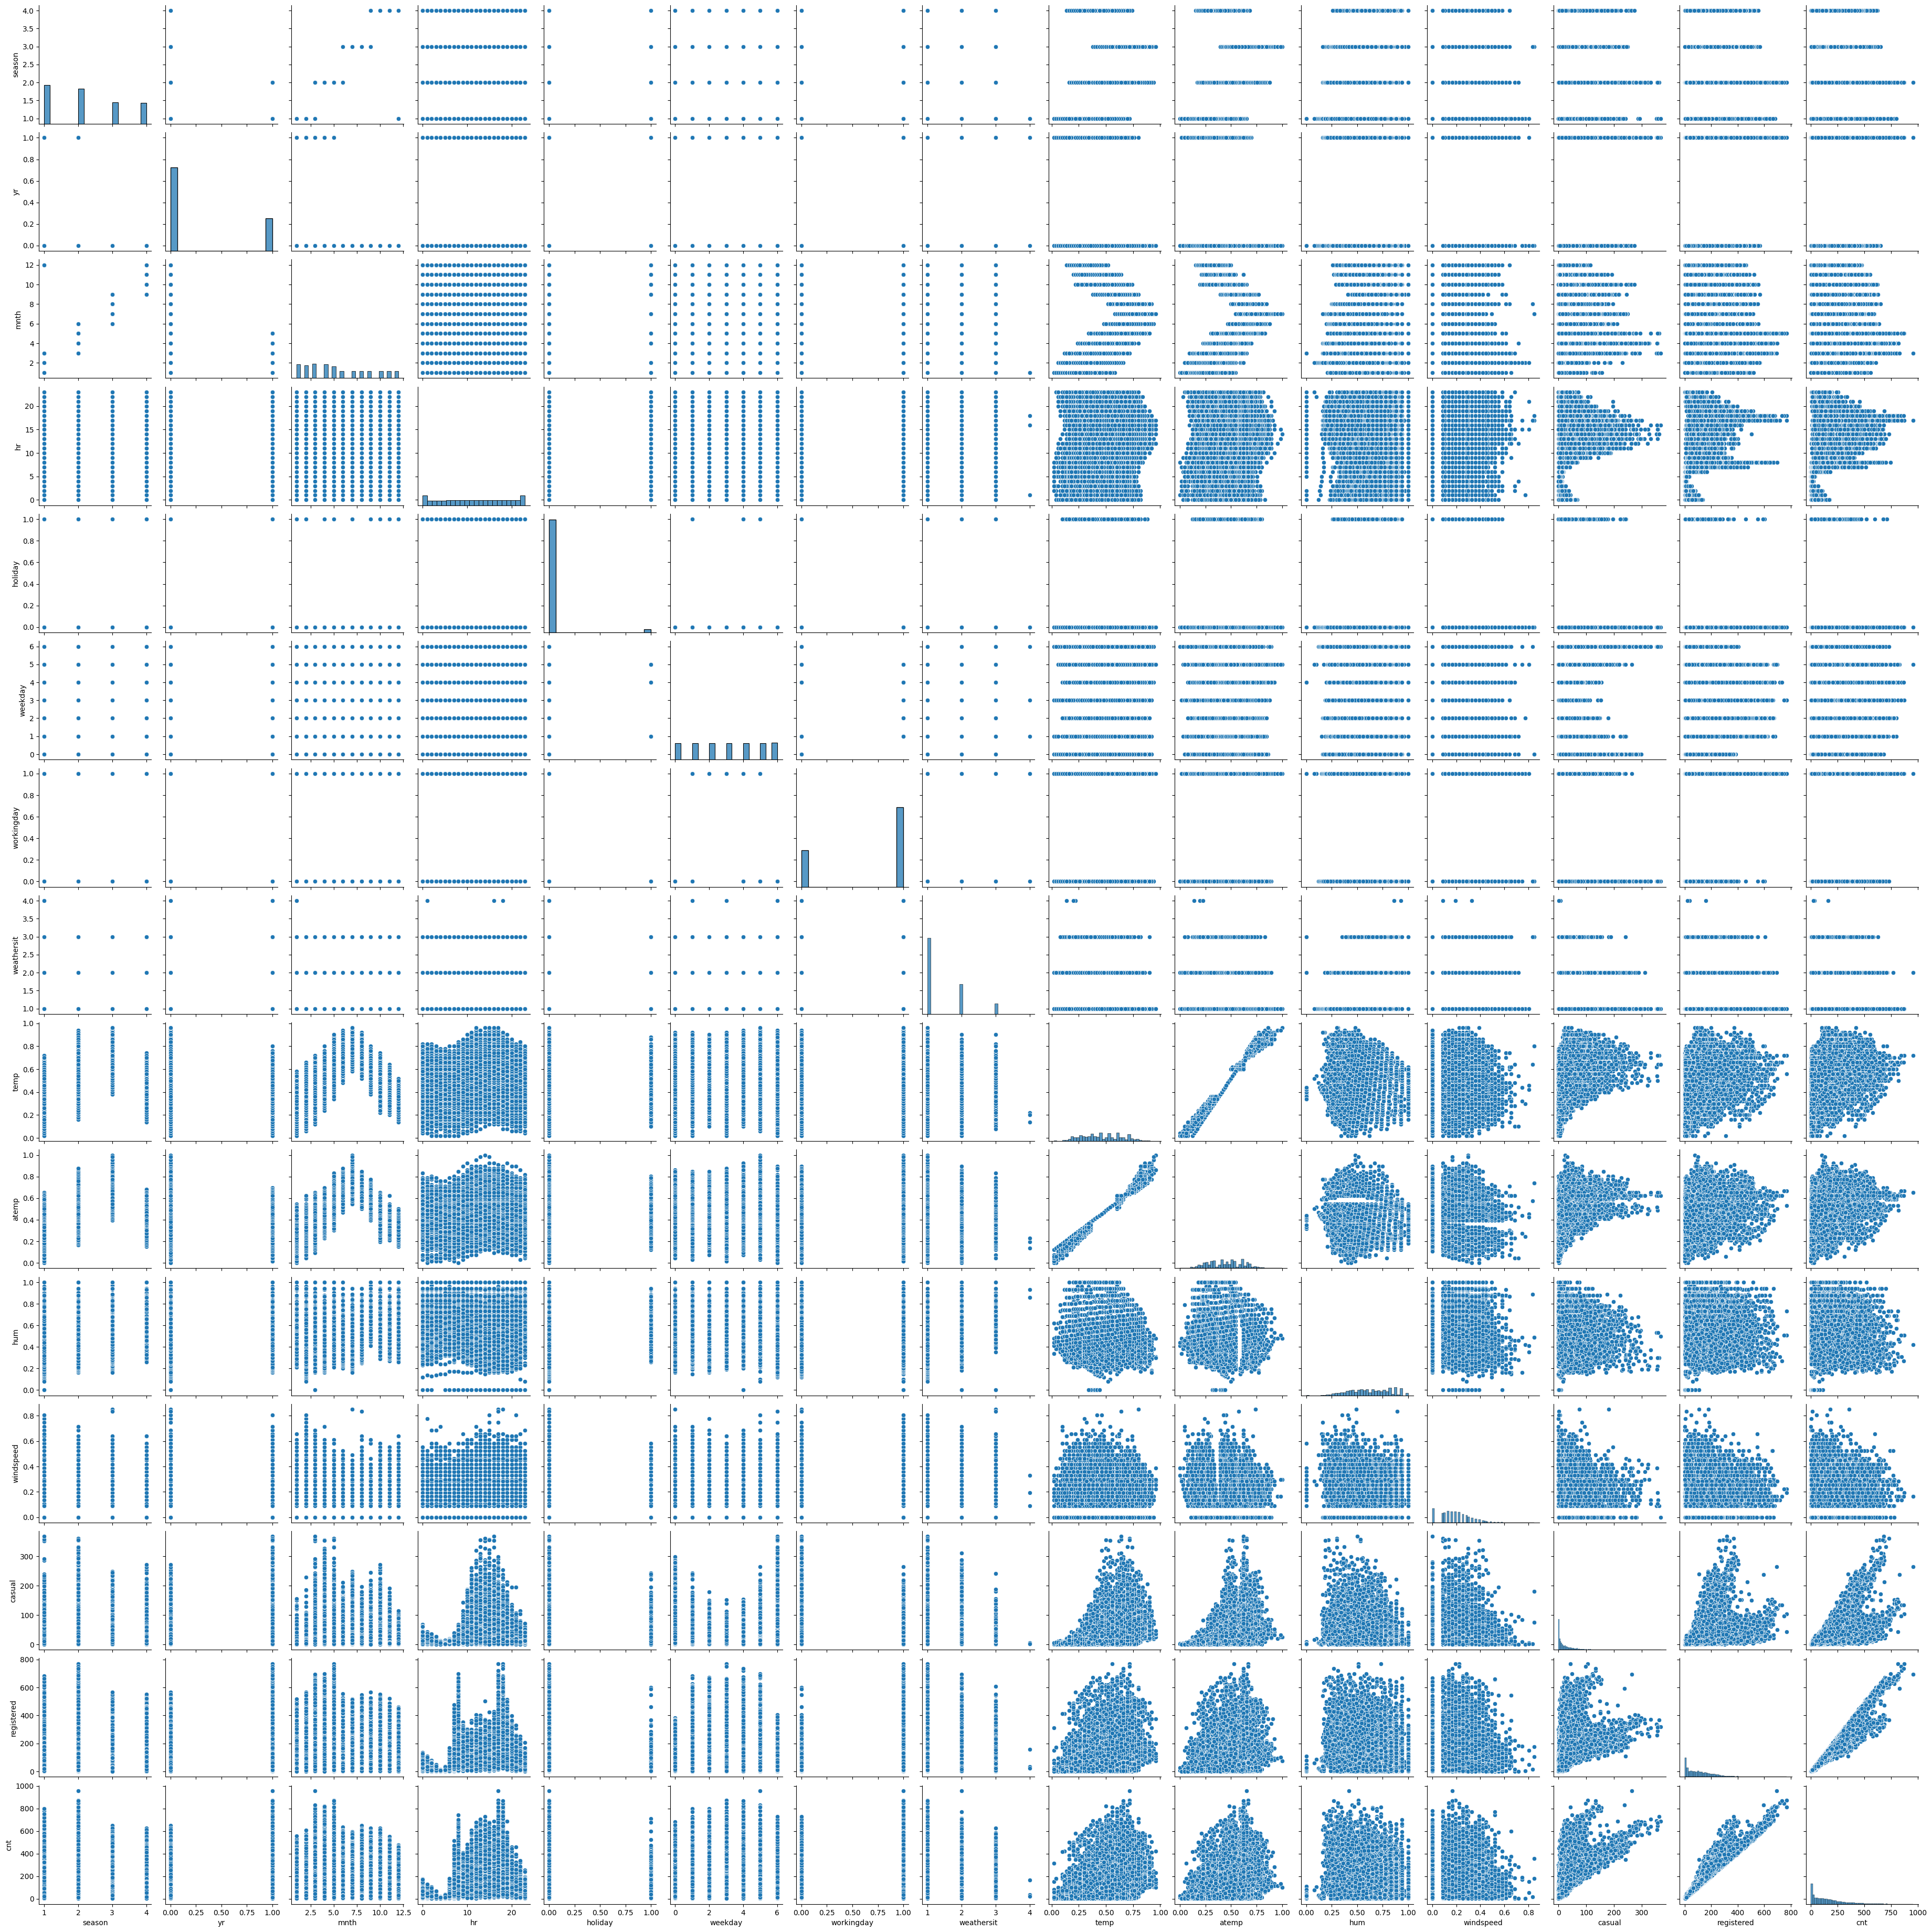

In [24]:
#hacemos un pairplot para ver como se relacionan las features
sns.pairplot(data_train_clean)

In [55]:
#procedemos a dividir la tabla limpia (data_train_clean) para entrenar y probar el modelo XGBoost
data_train, data_test = train_test_split(data_train_clean, test_size=.3, random_state=1999)

In [56]:
#para funcionar el modelo XGBoost necesita que se transforme los dataset a DMatrix, transformamos los que dividimos para entrenar el modelo y el que separamos para predecir
data_train_mat = xgb.DMatrix(data_train.drop("cnt", 1), label=data_train["cnt"])
data_test_mat = xgb.DMatrix(data_test.drop("cnt", 1), label=data_test["cnt"])
data_test_v_mat =  xgb.DMatrix(data_test_clean)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20244\1060984978.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_train_mat = xgb.DMatrix(data_train.drop("cnt", 1), label=data_train["cnt"])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20244\1060984978.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_test_mat = xgb.DMatrix(data_test.drop("cnt", 1), label=data_test["cnt"])


In [27]:
#Verificamos el tipo de objeto
data_train_mat

In [44]:
#definimos los parametros y las rondas de entrenamiento
parametros = {"booster":"gbtree", "max_depth": 2, "eta": 0.3, "objective": "reg:linear", "nthread":2}
rondas = 10

In [45]:
#Definimos el parámetro evaluación
evaluacion = [(data_test_mat, "eval"), (data_train_mat, "train")]

In [46]:
modelo = xgb.train(parametros, data_train_mat, rondas, evaluacion)

[00:21:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	eval-rmse:163.91147	train-rmse:156.23099
[1]	eval-rmse:121.51806	train-rmse:114.57255
[2]	eval-rmse:92.22415	train-rmse:85.79701
[3]	eval-rmse:71.29885	train-rmse:65.75556
[4]	eval-rmse:56.38898	train-rmse:51.13835
[5]	eval-rmse:44.22036	train-rmse:39.82762
[6]	eval-rmse:36.58690	train-rmse:32.35384
[7]	eval-rmse:29.86785	train-rmse:26.27890
[8]	eval-rmse:25.67387	train-rmse:22.20341
[9]	eval-rmse:22.06616	train-rmse:19.02304


In [47]:
#Verificamos el objeto modelo
modelo

In [62]:
#Guardamos el modelo
joblib.dump(modelo, 'modXGBoost_v1.pkl')

['modXGBoost_v1.pkl']

In [117]:
#Probamos el modelo con la base de datos test proporcionada por el Mentor Jonathan
prediccion_t = modelo.predict(data_test_mat)

In [104]:
def metricas(objetivo, prediccion):
    matriz_conf = confusion_matrix(objetivo, prediccion)
    score = accuracy_score(objetivo, prediccion)
    reporte = classification_report(objetivo, prediccion)
    metricas = [matriz_conf, score, reporte]
    return(metricas)

In [121]:
data_test['cnt']

3360    141
3110    279
5088    174
9524    291
2629    317
       ... 
2411    178
7754     74
4573    148
178      69
8152     72
Name: cnt, Length: 3600, dtype: int64

In [118]:
type(prediccion_t)

numpy.ndarray

In [119]:
#prediccion_t.reshape(0,1)
pred1 = pd.Series(prediccion_t)

In [120]:
pred1

0       136.284760
1       303.609924
2       175.990585
3       293.105377
4       283.879089
           ...    
3595    160.949036
3596     70.943222
3597    151.326294
3598     63.865746
3599     63.865746
Length: 3600, dtype: float32

In [122]:
metricas = metricas(data_test['cnt'], pred1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [107]:
#matriz_conf = confusion_matrix(data_test['cnt'], pred1)
score = accuracy_score(data_test['cnt'], pred1)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
prediccion = modelo.predict(data_test_v_mat)

In [83]:
#Asignamos una variable con el resultado de convertir la predicción en un dataframe.
pred = pd.DataFrame(prediccion,columns={'pred'})

In [81]:
pred

,pred
0,17.754206
1,17.754206
2,30.021538
3,86.606422
4,169.069641
...,...
5375,128.585617
5376,98.978882
5377,98.978882
5378,48.202549


In [84]:
pred.to_csv('Nippur7.csv', index = False )